### Sales Revenue across multiple channels like radio, tv, and newsapapers.
### Using linear regression to understand how spending on advertisements impacts sales.

# Business Questions:
### Is there a relationship between ads and sales?
### If so, how strong is that relationship?
### What types of ads contribute to sales?
### What is the effect each ad type has on sales?
### Given ad spending, can sales be predicted?

In [77]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [78]:
#read the data using pandas and head to display the top 5 records
data = pd.read_csv('/Users/diyasree/Downloads/Personal_Courses/Machine Learning/Simplilearn/Demo Datasets 2/Lesson 4/Advertising.csv')
data.head()
data.columns = ['Unnamed','TV', 'Radio', 'Newspaper', 'Sales']

In [79]:
#dropped unwanted column from the dataframe
data.drop('Unnamed', inplace=True, axis=1)

In [80]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

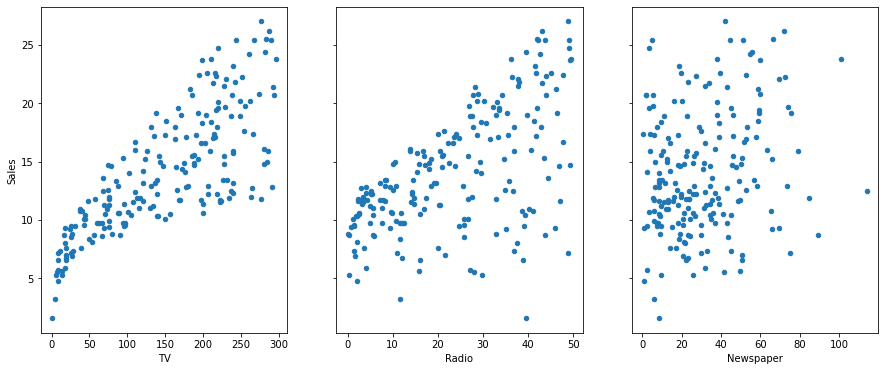

In [81]:
#visualize the relationship between the features and target variable sales using scatterplot
#initialize the scatterplot using below

fig, axs =plt.subplots(1,3, sharey = True)
data.plot(kind = 'scatter', x= 'TV', y = 'Sales', ax= axs[0],figsize=(15,6))
data.plot(kind='scatter', x='Radio', y='Sales', ax = axs[1])
data.plot(kind= 'scatter', x= 'Newspaper', y='Sales', ax= axs[2])

In [82]:
#applying linear regression analysis to estimate the relationship between sales and television ads spending
feature_cols = ['TV']
x = data[feature_cols] #independent variable
y = data.Sales #dependent variable

In [83]:
#importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression() #initializing the model
lm.fit(x,y) #fitting the model on x and y

LinearRegression()

In [84]:
#printing the intercept and coefficient of the resulting linear equation
print(lm.intercept_)
print(lm.coef_)


7.032593549127694
[0.04753664]


In [85]:
# By interpreting the model cefficients, a unit increase in television ad spending is associated with 0.04753664 (unit) increase in sales
#Now, using linear equation, using this for prediction.

In [86]:
#new market tv advertising sales $50000, what would be the prediction for the sales in that market,
#by using the previous results to calculate the new value for sales
7.032594+0.047537*50

9.409444

In [87]:
#predicting the new X value
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

TV
0  50

In [88]:
#using the above equation, predicting the sales in that market
lm.predict(X_new)

array([9.40942557])

In [89]:
#prediction for the smallest and largest observed values of X and use the predicted values to plot the least squares line

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [90]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

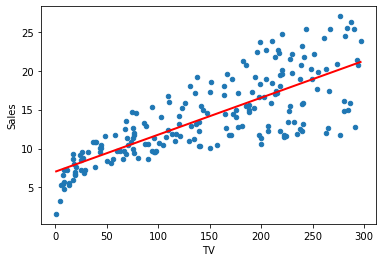

In [91]:
#initializing the scatter plot for 'TV' and 'Sales'
data.plot(kind = 'scatter', x = 'TV', y = 'Sales')
#plotting the least squares line
plt.plot(X_new, preds, c = 'red', linewidth = 2)


In [92]:
#looking at the plot, it has a high bias and a low variance model
#Hypothesis testing and p values
#using the null hypothesis, assuming there is no relationship between 'TV' Ads and 'Sales'
#testing the hypothesis
#reject the null hypothesis if the 95% confidence interval does not include '0'

In [93]:
#importing the stat model
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ TV', data = data).fit() #apply ols on 'TV' 'Sales'


In [94]:
lm.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

In [95]:
#printing the p values
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [96]:
#the output shows the p value for the model coefficients
#p value represnts the possibility that the coefficient is actually '0'
# In this case the p value for 'TV' is far less than 0.05 and hence, inferring that there is a relationship between 'TV' Ads and 'Sales'

#how well does the model fit the data,
#the most common way to evaluate the overall fit of a linear model is by using the R-square value


In [97]:
#printing the R-square value
lm.rsquared

0.611875050850071

In [98]:
#the threshold of a good r-quared value depends widely on the domain
#therefore, its most useful tool for comparing different models is Multiple Linear Regression


In [99]:
### considering all the independent variables to build a multiple linear regression model


In [100]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

from sklearn import model_selection
#creating a train test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size =0.3, random_state =42)

In [101]:
#Applying Linear Regression
lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [102]:
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

In [103]:
print(lm.intercept_)
print(lm.coef_)

predictions = lm.predict(xtest)
#printing the mean squared errror
print(sqrt(mean_squared_error(ytest, predictions)))

2.7089490925159048
[0.04405928 0.1992875  0.00688245]
1.9485372043446383


In [104]:
#using ols regresion results,achieved  lot of information in the model summary output
lm = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data= data).fit()
lm.summary() #understand the key findings from summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        21:04:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# 1. 'TV' and 'Radio' have significant p values whereas Newspaper doesn't.
#Thus, rejecting the null hypothesis for Tv and Radio
#There is no association between these features and Sales.
# However, failed to reject the null hypothesis for the variable Newspaper.

# 2. 'TV' and 'Radio' ads spending are both positively associated with sales, 
#whereas Newspaper ads spending is slightly negatively associated with sales 
#However, this is a relevance since, failed to reject the null hypothesis for the variable 'Newspaper'

# 3. This model has a higher R-squared value '0.897' than the previous model, 
#which means that this model provides a better fit to the data than a model that only includes 'TV' variable.


In [106]:
# Note: just for refernce
# Feature selection: features needs to be included in a linear model,
# 1) trying different ideas, look for small p values
# 2)check whether the R-squared value goes up while adding new predictors.


In [107]:
lm = smf.ols(formula = 'Sales ~ TV+Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [108]:
#R-squared value always increase when adding more features to the model, even if they are unrelated to the response.
#selecting the model of highest R-squared value is not a reliable approach for choosing a best linear model

lm = smf.ols(formula = 'Sales ~ TV +Radio + Newspaper', data=data).fit()
lm.rsquared


0.8972106381789522

In [109]:
#Handling categorical predictors with two categories
# what if one of the predictors is categorical
#creating a new feature called size and randomly assign observations to be small or large.

import numpy as np 
np.random.seed(12345) #setting up a random seed 

#assigning observations as small and large
nums = np.random.rand(len(data))
mask_large = nums>0.5

data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

TV  Radio  Newspaper  Sales   Size
0  230.1   37.8       69.2   22.1  large
1   44.5   39.3       45.1   10.4  small
2   17.2   45.9       69.3    9.3  small
3  151.5   41.3       58.5   18.5  small
4  180.8   10.8       58.4   12.9  large

In [110]:
#creating a dummy variable that represents the categories as a binary value.
data['IsLarge'] = data.Size.map({'small': 0, 'large': 1})
data.head()



TV  Radio  Newspaper  Sales   Size  IsLarge
0  230.1   37.8       69.2   22.1  large        1
1   44.5   39.3       45.1   10.4  small        0
2   17.2   45.9       69.3    9.3  small        0
3  151.5   41.3       58.5   18.5  small        0
4  180.8   10.8       58.4   12.9  large        1

In [111]:
#Now, multiple linear regression with categorical vpredictors
#also , include the "IsLarge" predictor.

feature_cols =['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

zip(feature_cols, lm.coef_)

In [112]:
np.random.seed(123456)

#Interpreting the 'IsLarge' coefficient
#for given amount of TV, Radio, Newspaper ads being a large market is associated
#with an average increase in sales of 52.42 widgets as compared to a small market.


nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()


TV  Radio  Newspaper  Sales   Size  IsLarge      Area
0  230.1   37.8       69.2   22.1  large        1     rural
1   44.5   39.3       45.1   10.4  small        0     urban
2   17.2   45.9       69.3    9.3  small        0     rural
3  151.5   41.3       58.5   18.5  small        0     urban
4  180.8   10.8       58.4   12.9  large        1  suburban

In [113]:
#creating a new feature called area and randomly assign observations to be rural, suburban or urban.
#creating another dummy variable 
area_dummies = pd.get_dummies(data.Area, prefix = 'Area').iloc[:,1:]
data = pd.concat([data, area_dummies], axis =1)
data.head()


TV  Radio  Newspaper  Sales   Size  IsLarge      Area  Area_suburban  \
0  230.1   37.8       69.2   22.1  large        1     rural              0   
1   44.5   39.3       45.1   10.4  small        0     urban              0   
2   17.2   45.9       69.3    9.3  small        0     rural              0   
3  151.5   41.3       58.5   18.5  small        0     urban              0   
4  180.8   10.8       58.4   12.9  large        1  suburban              1   

   Area_urban  
0           0  
1           1  
2           0  
3           1  
4           0

In [114]:
#including two dummy variables in the model

feature_cols = ['TV', 'Radio', 'Newspaper','IsLarge','Area_suburban','Area_urban']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)
print(feature_cols, lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [ ]:
# Considering all other variables as fixed, 
#being in sub urban area associated with an average decrease in sales "-106.56 widgets" as compared to the base line level which is rural
#being in urban area associated with an average increase in sales of 268.13 widgets as compared to rural.